In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# K-Means on a synthetic data set

In [6]:
# We need to set a random seed
np.random.seed(0)

In [ ]:
# We will be making random clusters of points
# X = The generated samples.
# y = The integer labels for cluster membership of each sample. 
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

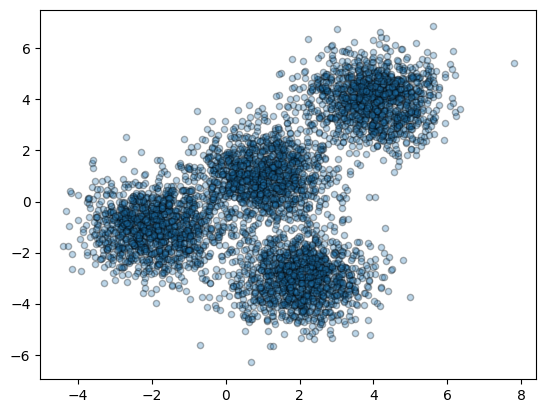

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

# Modeling

In [9]:
# k-means++: Selects initial cluster centres for k-means clustering in a smart way to speed up convergence
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [10]:
k_means.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [12]:
# Get the label for each point in the model
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 3, ..., 3, 1, 1], shape=(5000,), dtype=int32)

In [14]:
# Get the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.95489462, -1.03564706],
       [ 3.99211079,  3.99540917],
       [ 2.00811148, -3.01440138],
       [ 1.01557176,  1.03442098]])

# Visual Plot

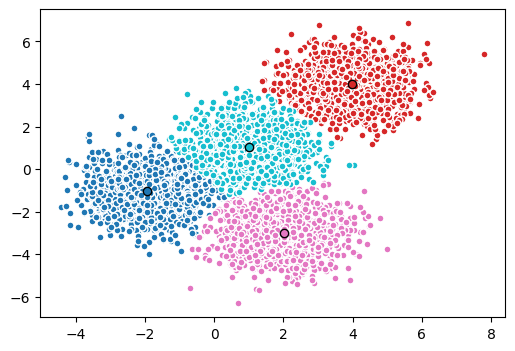

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(4), colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('K-means clustering', fontsize=16)
